In [2]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)

# 1. Tổng quan dữ liệu

Load

In [3]:
df = pd.read_csv('../data/raw.csv')

Cấu trúc

In [4]:
df.head()

,url,ten_san_pham,ngay_dang,nam_sx,nhien_lieu,kieu_dang,tinh_trang,so_km,hop_so,xuat_xu,dia_diem,gia_ban
0,https://oto.com.vn/mua-ban-xe-toyota-corolla-a...,Toyota Corolla Altis 1.8 G 2019,09/10/2025,2019,Máy xăng,Sedan,Xe cũ,85.000 km,Số tự động,Trong nước,Hóc Môn - Tp.HCM,485 triệu
1,https://oto.com.vn/mua-ban-xe-hyundai-accent-h...,Hyundai Accent 1.4 MT Tiêu chuẩn 2022,26/10/2025,2022,Máy xăng,Sedan,Xe cũ,21.000 km,Số sàn,Trong nước,Tp.HCM,345 triệu
2,https://oto.com.vn/mua-ban-xe-toyota-innova-hc...,Toyota Innova 2.0G 2012,23/10/2025,2012,Máy xăng,MPV,Xe cũ,150.000 km,Số tự động,Nhập khẩu,Tp.HCM,350 triệu
3,https://oto.com.vn/mua-ban-xe-vinfast-lux-a20-...,VinFast LUX A2.0 Cao cấp 2021,22/10/2025,2021,Máy xăng,Sedan,Xe cũ,57.000 km,Số tự động,Trong nước,Tp.HCM,495 triệu
4,https://oto.com.vn/mua-ban-xe-toyota-camry-hcm...,Toyota Camry 2.5Q 2019,23/10/2025,2019,Máy xăng,Sedan,Xe cũ,99.892 km,Số tự động,Nhập khẩu,Hóc Môn - Tp.HCM,810 triệu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           5900 non-null   object
 1   ten_san_pham  5900 non-null   object
 2   ngay_dang     5900 non-null   object
 3   nam_sx        5900 non-null   int64 
 4   nhien_lieu    5900 non-null   object
 5   kieu_dang     5722 non-null   object
 6   tinh_trang    5900 non-null   object
 7   so_km         5900 non-null   object
 8   hop_so        5900 non-null   object
 9   xuat_xu       5805 non-null   object
 10  dia_diem      5900 non-null   object
 11  gia_ban       5900 non-null   object
dtypes: int64(1), object(11)
memory usage: 553.2+ KB


Giá trị một số trường

In [6]:
object_fields = df.drop(columns=['url', 'ngay_dang', 'ten_san_pham', "so_km", "gia_ban"]).select_dtypes(object).columns

for field in object_fields:
    print(f'{field}: {df[field].value_counts().to_dict()}\n')

nhien_lieu: {'Máy xăng': 4755, 'Máy dầu': 727, 'Điện': 293, 'Hybrid': 122, 'Loại khác': 2, 'SUV': 1}

kieu_dang: {'SUV': 2084, 'Sedan': 1694, 'MPV': 563, 'Hatchback': 538, 'Bán tải': 298, 'Crossover': 258, 'Van/Minivan': 114, 'Xe tải': 96, 'Coupe': 28, 'Sport Car': 17, 'Convertible': 16, 'Minibus': 14, 'Wagon': 1, 'Special Purpose': 1}

tinh_trang: {'Xe cũ': 4846, 'Xe mới': 1054}

hop_so: {'Số tự động': 5053, 'Số sàn': 843, 'Số hỗn hợp': 3, 'Nhập khẩu': 1}

xuat_xu: {'Trong nước': 3054, 'Nhập khẩu': 2751}

dia_diem: {'Tp.HCM': 848, 'Hà Nội': 744, 'Bình Dương': 377, 'Đà Nẵng': 288, 'Quận 7 - Tp.HCM': 215, 'Kiến An - Hải Phòng': 214, 'Thuận An - Bình Dương': 209, 'Thủ Đức - Tp.HCM': 195, 'Cầu Giấy - Hà Nội': 189, 'An Lão - Hải Phòng': 166, 'Long Biên - Hà Nội': 143, 'Hải Phòng': 121, 'Dĩ An - Bình Dương': 117, 'Nam Từ Liêm - Hà Nội': 114, 'Gò Vấp - Tp.HCM': 113, 'Tân Phú - Tp.HCM': 108, 'Thanh Xuân - Hà Nội': 99, 'Hoàng Mai - Hà Nội': 76, 'Bắc Từ Liêm - Hà Nội': 69, 'Nghệ An': 67, 'Đông 

Ngày đăng

In [7]:
post_days = df.ngay_dang.dropna().apply(lambda x: pd.to_datetime(x, dayfirst=True))

first_day, last_day = post_days.min(), post_days.max()

print(f'First day: {first_day}\nLast day: {last_day}')

First day: 2025-02-13 00:00:00
Last day: 2025-10-26 00:00:00


Encoding so_km

In [9]:
import re

df.so_km = df.so_km.apply(lambda x: float(re.sub(r'[^0-9]', '', x)))

Encoding gia_ban

In [ ]:
def to_billions(text):
    text = text.lower().strip()

    ti = 0
    trieu = 0

    match_ti = re.search(r'(\d+(?:[\.,]\d+)?)\s*t[ỉi]', text)
    if match_ti:
        ti = float(match_ti.group(1).replace(',', '.'))

    match_trieu = re.search(r'(\d+(?:[\.,]\d+)?)\s*triệu', text)
    if match_trieu:
        trieu = float(match_trieu.group(1).replace(',', '.'))

    result = ti + trieu / 1000
    return result

In [ ]:
df.gia_ban = df.gia_ban.apply(to_billions)

In [17]:
df.describe()

,nam_sx,so_km,gia_ban
count,5900.00,5900.00,5900.00
mean,2019.52,60640.38,0.84
std,4.82,162437.17,1.32
min,1989.00,0.00,0.03
25%,2017.00,5000.00,0.35
50%,2021.00,49999.50,0.52
75%,2023.00,85000.00,0.80
max,2025.00,11123456.00,26.79


Nhận xét:
- so_km có giá trị ngoại lai 11123456.00, tương đương khoảng 270 vòng trái đất
- Trung bình cao so với trung vị (phân vị 50%)
- Phương sai rất cao (162437.17 ^ 2)

# 2. Xử lý missing

In [18]:
df.isna().sum()

url               0
ten_san_pham      0
ngay_dang         0
nam_sx            0
nhien_lieu        0
kieu_dang       178
tinh_trang        0
so_km             0
hop_so            0
xuat_xu          95
dia_diem          0
gia_ban           0
dtype: int64

In [22]:
df.kieu_dang = df.kieu_dang.fillna(df.kieu_dang.mode()[0])

In [19]:
median_price = df.gia_ban.median()

mask = df.xuat_xu.isna()
df.loc[mask & (df['gia_ban'] < median_price), 'xuat_xu'] = 'Trong nước'
df.loc[mask & (df['gia_ban'] >= median_price), 'xuat_xu'] = 'Nhập khẩu'

# 3. Xử lý outliers

In [26]:
q1 = df.so_km.quantile(0.25)
q3 = df.so_km.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['so_km'] < lower_bound) | (df['so_km'] > upper_bound)]

print("Số lượng outlier:", len(outliers))
print("Phần trăm outlier:", len(outliers) / df.shape[0] * 100)
print("Top 5 outliers lớn nhất", sorted(outliers.so_km, reverse=True)[:5])

Số lượng outlier: 117
Phần trăm outlier: 1.9830508474576272
Top 5 outliers lớn nhất [11123456.0, 990000.0, 955000.0, 910000.0, 900000.0]


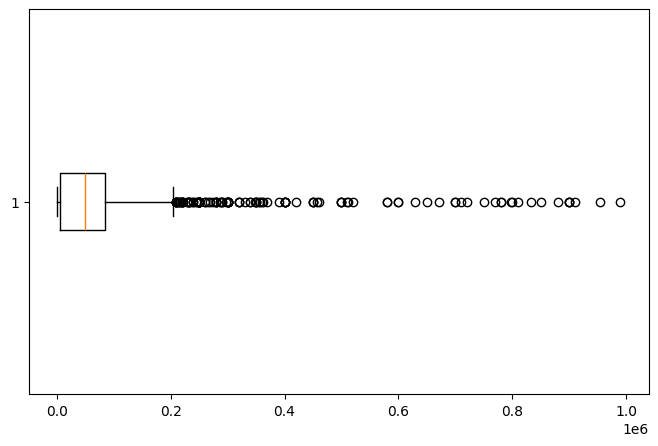

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(df.so_km.drop(df.so_km.idxmax()), vert=False)
plt.show()

In [29]:
df.so_km = df.so_km.clip(upper=upper_bound)

In [30]:
df.so_km.describe()

count     5900.00
mean     54672.87
std      51315.82
min          0.00
25%       5000.00
50%      49999.50
75%      85000.00
max     205000.00
Name: so_km, dtype: float64

In [41]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.to_csv('../data/cleaned.csv', index=False, encoding='utf-8')

# 4. Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df.copy()

float_cols = df.select_dtypes([float, int]).columns
df_scaled[[col + '_scaled' for col in float_cols]] = scaler.fit_transform(df[float_cols])

In [43]:
df_scaled.to_csv('../data/scaled.csv')